# Final Project - Kang

My final project will revolve around a much-talked about dataset within our data science class and the data science community - housing value data. Utilizing Zillow's provided home and rental value data on Kaggle, I will perform EDA on city and state level data. After examining city and state level data, I will aggregate city level data in order to calculate a 'US' median for all relevant variables. After EDA, I would like to evaluate the relationship between rental price levels and housing sale prices, and see if there is a statistically significant relationship between the two. I hypothesize that upward pressure of rental prices will generate similar upward pressures on nearby housing values. I will apply machine learning techniques learned in class to generate results.

This is an interesting venue of the housing market, especially with new sharing economy applications such as AirBnB that allow for (very) short-term rentals within a housing area. There is a concern among renters and home owners that Airbnb contributes to already stiflingly high home value prices (https://www.wsj.com/articles/how-airbnb-affects-home-prices-and-rents-1508724361), while increasing rental properties within a community seem to depress home ownership prices (https://www.washingtonpost.com/news/where-we-live/wp/2015/10/21/too-many-rentals-in-neighborhood-can-cause-property-values-to-stagnate/?utm_term=.4177f898c54d). The proportion of renters and owners will especially be important in bigger metro areas, where younger professionals are migrating towards and tend to rent rather than own.          

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [3]:
# Parse dates
df = pd.read_csv('input/City_time_series.csv',parse_dates=['Date'],infer_datetime_format=True)

In [4]:
df.dtypes

Date                                                             datetime64[ns]
RegionName                                                               object
HomesSoldAsForeclosuresRatio_AllHomes                                   float64
InventorySeasonallyAdjusted_AllHomes                                    float64
InventoryRaw_AllHomes                                                   float64
MedianListingPricePerSqft_1Bedroom                                      float64
MedianListingPricePerSqft_2Bedroom                                      float64
MedianListingPricePerSqft_3Bedroom                                      float64
MedianListingPricePerSqft_4Bedroom                                      float64
MedianListingPricePerSqft_5BedroomOrMore                                float64
MedianListingPricePerSqft_AllHomes                                      float64
MedianListingPricePerSqft_CondoCoop                                     float64
MedianListingPricePerSqft_DuplexTriplex 

In [5]:
df.isnull().sum()

Date                                                                   0
RegionName                                                             0
HomesSoldAsForeclosuresRatio_AllHomes                            3490717
InventorySeasonallyAdjusted_AllHomes                             3415377
InventoryRaw_AllHomes                                            3415377
MedianListingPricePerSqft_1Bedroom                               4164542
MedianListingPricePerSqft_2Bedroom                               4093276
MedianListingPricePerSqft_3Bedroom                               3915270
MedianListingPricePerSqft_4Bedroom                               4027005
MedianListingPricePerSqft_5BedroomOrMore                         4132479
MedianListingPricePerSqft_AllHomes                               3640031
MedianListingPricePerSqft_CondoCoop                              4108715
MedianListingPricePerSqft_DuplexTriplex                          4164460
MedianListingPricePerSqft_SingleFamilyResidence    

As expected with monthly housing data at a City/State level, there are numerous missing values. Further analysis will be needed to see if there are any patterns of missing values.

In [6]:
null_data = df[df.isnull().any(axis=1)] 

In [7]:
null_data

Date                        RegionName  HomesSoldAsForeclosuresRatio_AllHomes  InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  MedianListingPricePerSqft_3Bedroom  MedianListingPricePerSqft_4Bedroom  MedianListingPricePerSqft_5BedroomOrMore  MedianListingPricePerSqft_AllHomes  MedianListingPricePerSqft_CondoCoop  MedianListingPricePerSqft_DuplexTriplex  MedianListingPricePerSqft_SingleFamilyResidence  MedianListingPrice_1Bedroom  MedianListingPrice_2Bedroom  MedianListingPrice_3Bedroom  MedianListingPrice_4Bedroom  MedianListingPrice_5BedroomOrMore  MedianListingPrice_AllHomes  MedianListingPrice_CondoCoop  MedianListingPrice_DuplexTriplex  MedianListingPrice_SingleFamilyResidence  MedianPctOfPriceReduction_AllHomes  MedianPctOfPriceReduction_CondoCoop  MedianPctOfPriceReduction_SingleFamilyResidence  MedianPriceCutDollar_AllHomes  MedianPriceCutDollar_CondoCoop  \
0       1996-04-30                abbottstownadamspa                                    NaN                                   NaN                    NaN                                 NaN                                 NaN                                 NaN                                 NaN                                       NaN                                 NaN                                  NaN                                      NaN                                              NaN                          NaN                          NaN                          NaN                          NaN                                NaN                          NaN                           NaN                               NaN                                       NaN                                 NaN                                  NaN                                              NaN                            NaN                             NaN   
1       1996-04-30                 aberdeenharfordmd                                    NaN                                   NaN                    NaN                                 NaN                                 NaN                                 NaN                                 NaN                                       NaN                                 NaN                                  NaN                                      NaN                                              NaN                          NaN                          NaN                          NaN                          NaN                                NaN                          NaN                           NaN                               NaN                                       NaN                                 NaN                                  NaN                                              NaN                            NaN                             NaN   
2       1996-04-30                  aberdeenmonroems                                    NaN                                   NaN                    NaN                                 NaN                                 NaN                                 NaN                                 NaN                                       NaN                                 NaN                                  NaN                                      NaN                                              NaN                          NaN                          NaN                          NaN                          NaN                                NaN                          NaN                           NaN                               NaN                                       NaN                                 NaN                                  NaN                                              NaN                            NaN                             NaN   
3       1996-04-30                   aberdeenmoorenc                                    NaN                   

It appears that almost all observations have one or more null values -- this stems from the vast number of variables and the long time period collected (1996-2017). I will have to restrict our datatset to variables of interest.  

In [8]:
# Select for variables that are related to the ZHVI and ZRI index. 
df = df[['RegionName','Date','ZHVIPerSqft_AllHomes','ZHVI_1bedroom', 'ZHVI_2bedroom', 'ZHVI_3bedroom', 'ZHVI_4bedroom', 'ZHVI_5BedroomOrMore', 'ZHVI_AllHomes', 'ZHVI_BottomTier', 'ZHVI_CondoCoop', 'ZHVI_MiddleTier', 'ZHVI_SingleFamilyResidence', 'ZHVI_TopTier','ZRI_AllHomes','ZRI_AllHomesPlusMultifamily','ZriPerSqft_AllHomes','Zri_MultiFamilyResidenceRental','Zri_SingleFamilyResidenceRental']]

One must go through the ZHVI methodology to understand how the ZHVI is calculated. Zillow aimed to rectify for the temporal issue in median home value indexes. If more expensive houses were sold at a significantly higher rate than a cheaper house did, then this would affect the area's median home value, and belie actual stagnation of home prices for the area. Zillow laments that the "best" home value index would be a "basket of goods" approach, not unlike how CPIs are calculated. Zillow overcomes this as it states: "The innovation that Zillow developed in 2005 was a way of approximating this ideal home price index by leveraging the valuations Zillow creates on all homes (called Zestimates). Instead of actual sale prices on every home, the index is created from estimated sale prices on every home...But, importantly, Zillow has estimated sale prices not just for the homes that sold, but for all homes even if they didn’t sell in that time period. From this data, a comprehensive and robust benchmark of home value trends can be computed which is immune to the changing mix of properties that sell in different periods of time." Please see https://www.zillow.com/research/zhvi-methodology-6032/.

In [10]:
# Drop observations where all variables of interest are NA
df2 = df.dropna(subset=['ZHVIPerSqft_AllHomes', 'ZHVI_1bedroom', 'ZHVI_2bedroom', 'ZHVI_3bedroom', 'ZHVI_4bedroom', 'ZHVI_5BedroomOrMore', 'ZHVI_AllHomes', 'ZHVI_BottomTier', 'ZHVI_CondoCoop', 'ZHVI_MiddleTier', 'ZHVI_SingleFamilyResidence', 'ZHVI_TopTier','ZRI_AllHomes','ZRI_AllHomesPlusMultifamily','ZriPerSqft_AllHomes','Zri_MultiFamilyResidenceRental','Zri_SingleFamilyResidenceRental'], how='all')
#Cite: https://stackoverflow.com/questions/14991195/how-to-remove-rows-with-null-values-from-kth-column-onward-in-python

In [11]:
df2.isnull().sum()

RegionName                               0
Date                                     0
ZHVIPerSqft_AllHomes                629949
ZHVI_1bedroom                      2853254
ZHVI_2bedroom                      1634848
ZHVI_3bedroom                       976383
ZHVI_4bedroom                      1450008
ZHVI_5BedroomOrMore                2401933
ZHVI_AllHomes                       564925
ZHVI_BottomTier                     936338
ZHVI_CondoCoop                     2371941
ZHVI_MiddleTier                     568955
ZHVI_SingleFamilyResidence          571659
ZHVI_TopTier                        534957
ZRI_AllHomes                       2100052
ZRI_AllHomesPlusMultifamily        2098454
ZriPerSqft_AllHomes                2184830
Zri_MultiFamilyResidenceRental     2722647
Zri_SingleFamilyResidenceRental    2099760
dtype: int64

In [12]:
df.groupby('Date').median()

ZHVIPerSqft_AllHomes  ZHVI_1bedroom  ZHVI_2bedroom  ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  ZHVI_AllHomes  ZHVI_BottomTier  ZHVI_CondoCoop  ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental
Date                                                                                                                                                                                                                                                                                                                                                         
1996-04-30                  67.0        69700.0        84400.0       104100.0       146550.0             199100.0       103550.0          83200.0         96500.0         103600.0                    105800.0      143100.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-05-31                  67.0        69500.0        84400.0       104400.0       146400.0             199100.0       103650.0          83100.0         96400.0         103750.0                    105900.0      143400.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-06-30                  67.0        69100.0        84500.0       104700.0       146500.0             198100.0       103500.0          82900.0         96600.0         103500.0                    105800.0      142900.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-07-31                  67.0        68800.0        84500.0       104800.0       146500.0             197900.0       103600.0          82800.0         96800.0         103700.0                    105700.0      142800.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-08-31                  67.0        68450.0        84500.0       105100.0       146700.0             197000.0       103900.0          82900.0         96700.0         104000.0                    105900.0      143000.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-09-30                  68.0        68300.0        84500.0       105500.0       147000.0             196800.0       104300.0          82900.0         96900.0         104400.0                    106100.0      143400.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-10-31                  68.0        68500.0        84700.0       105700.0       147150.0             196450.0       104500.0          82800.0         97000.0         104600.0                    106400.0      143400.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-11-30                  68.0        68500.0        84800.0       105800.0       147400.0             197250.0       104600.0          82900.0         97200.0         104700.0                    106750.0      143700.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-12-31                  68.0        68300.0        85000.0       106100.0       148000.0             198350.0       104800.0          83000.0         97200.0         104900.0                    107000.0      144100.0           NaN                          NaN                  NaN                             NaN                              NaN
1997-01-31                  68.0        68200.0        85100.0       106300.0       148400.0             199500.0       105300.0          83300.0         97700.0 

One comment to note is that there is an imbalance of data between Zillow home values and Zillow rental values. As seen above there are many more null values with the rental index, and in fact, there is no value collected by Zillow before November 2010. Unfortunately this is an aspect of data and caveat we will have to deal with in our analysis.   

In [13]:
# Regression data preparation
crosswalk = pd.read_csv('input/cities_crosswalk.csv')

In [14]:
crosswalk.rename(columns={'Unique_City_ID': 'RegionName'}, inplace=True)
#Cite: https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

In [15]:
newdf = pd.merge(crosswalk, df2, on='RegionName')

I will prepare two sets of regression data -- 1) a median of all observations to calculate a 'US' median, and 2) a panel dataset of 1)'s components, by geographic area.

In [16]:
geogdata = newdf

In [17]:
geogdata = geogdata.dropna(subset=['ZRI_AllHomes'], how='any')

In [18]:
usregdata = newdf.groupby('Date').median()

In [19]:
usregdata2 = usregdata.dropna(subset=['ZRI_AllHomes'], how='any')
# Keep for only non-null values of ZRI. 

In [20]:
usregdata2 = usregdata2.reset_index()

Below I conduct quick EDA on state level data, to see what is going on with the components of our overall US trend.

In [21]:
# State Level analyses
dfstate = pd.read_csv('input/State_time_series.csv',parse_dates=['Date'],infer_datetime_format=True)

In [22]:
dfstate = dfstate[['RegionName','Date','ZHVIPerSqft_AllHomes','PctOfHomesDecreasingInValues_AllHomes','PctOfHomesIncreasingInValues_AllHomes', 'ZHVI_1bedroom', 'ZHVI_2bedroom', 'ZHVI_3bedroom', 'ZHVI_4bedroom', 'ZHVI_5BedroomOrMore', 'ZHVI_AllHomes', 'ZHVI_BottomTier', 'ZHVI_CondoCoop', 'ZHVI_MiddleTier', 'ZHVI_SingleFamilyResidence', 'ZHVI_TopTier','PriceToRentRatio_AllHomes','ZRI_AllHomes','ZRI_AllHomesPlusMultifamily','ZriPerSqft_AllHomes','Zri_MultiFamilyResidenceRental','Zri_SingleFamilyResidenceRental']]

In [23]:
dfstate = dfstate.dropna(subset=['ZHVIPerSqft_AllHomes','PctOfHomesDecreasingInValues_AllHomes','PctOfHomesIncreasingInValues_AllHomes', 'ZHVI_1bedroom', 'ZHVI_2bedroom', 'ZHVI_3bedroom', 'ZHVI_4bedroom', 'ZHVI_5BedroomOrMore', 'ZHVI_AllHomes', 'ZHVI_BottomTier', 'ZHVI_CondoCoop', 'ZHVI_MiddleTier', 'ZHVI_SingleFamilyResidence', 'ZHVI_TopTier','PriceToRentRatio_AllHomes','ZRI_AllHomes','ZRI_AllHomesPlusMultifamily','ZriPerSqft_AllHomes','Zri_MultiFamilyResidenceRental','Zri_SingleFamilyResidenceRental'], how='all')

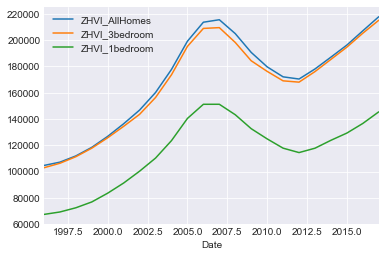

In [24]:
dfstate.groupby(dfstate.Date.dt.year)['ZHVI_AllHomes','ZHVI_3bedroom','ZHVI_1bedroom'].mean().plot(kind='line')

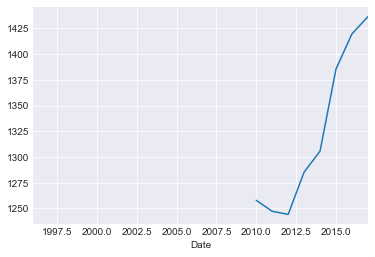

In [25]:
dfstate.groupby(dfstate.Date.dt.year)['ZRI_AllHomes'].mean().plot(kind='line')

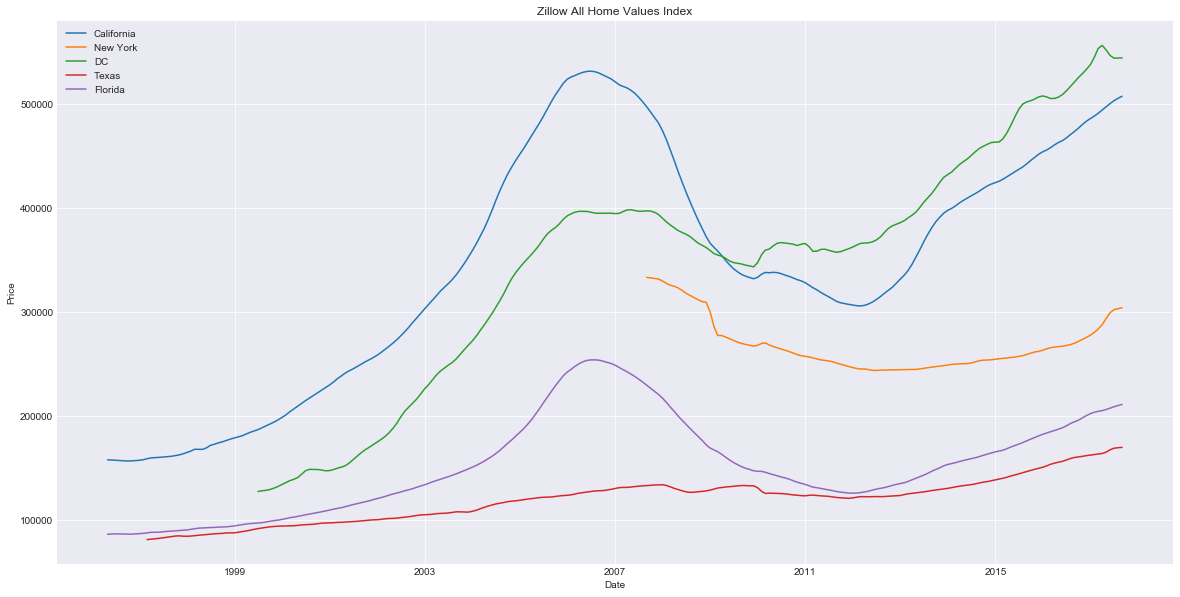

In [26]:
plt.figure(figsize=(20,10))
plt.plot(dfstate[(dfstate['RegionName'] == 'California')]['Date'], dfstate[(dfstate['RegionName'] == 'California')]['ZHVI_AllHomes'], label="California")
plt.plot(dfstate[(dfstate['RegionName'] == 'NewYork')]['Date'], dfstate[(dfstate['RegionName'] == 'NewYork')]['ZHVI_AllHomes'], label="New York")
plt.plot(dfstate[(dfstate['RegionName'] == 'DistrictofColumbia')]['Date'], dfstate[(dfstate['RegionName'] == 'DistrictofColumbia')]['ZHVI_AllHomes'], label="DC")
plt.plot(dfstate[(dfstate['RegionName'] == 'Texas')]['Date'], dfstate[(dfstate['RegionName'] == 'Texas')]['ZHVI_AllHomes'], label="Texas")
plt.plot(dfstate[(dfstate['RegionName'] == 'Florida')]['Date'], dfstate[(dfstate['RegionName'] == 'Florida')]['ZHVI_AllHomes'], label="Florida")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Zillow All Home Values Index")
plt.legend()
plt.show()

# Cite: https://www.kaggle.com/poonaml/real-estate-prediction-on-zillow-with-prophet. The kaggle kernel uses Zillow's median house value, as opposed to the ZHVI. The code is fully mine.  

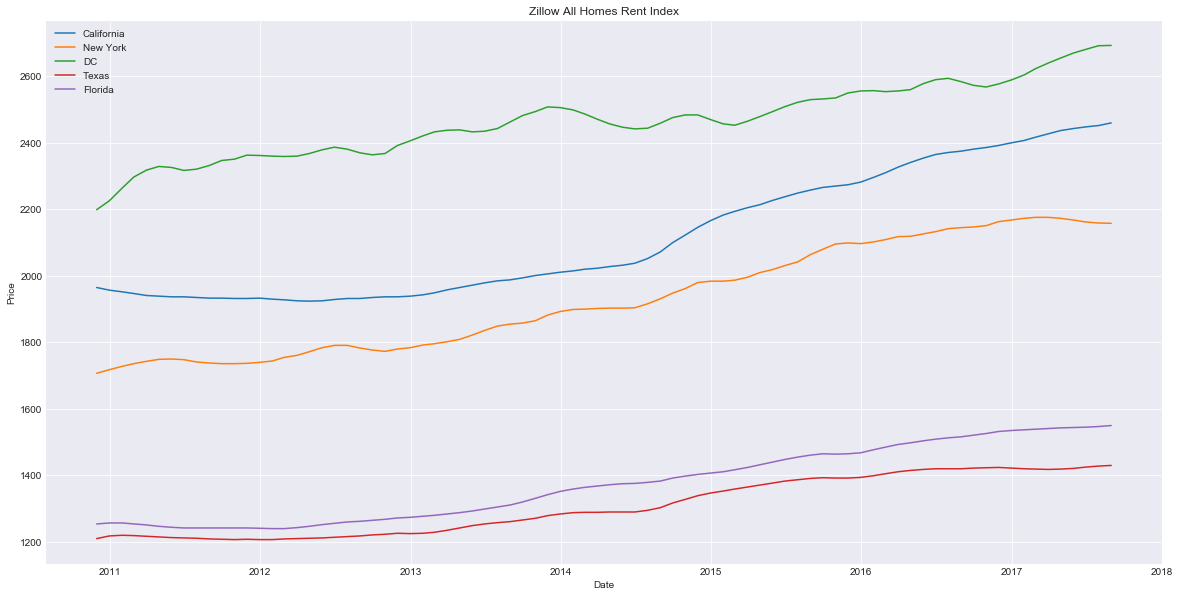

In [27]:
plt.figure(figsize=(20,10))
plt.plot(dfstate[(dfstate['RegionName'] == 'California')]['Date'], dfstate[(dfstate['RegionName'] == 'California')]['ZRI_AllHomes'], label="California")
plt.plot(dfstate[(dfstate['RegionName'] == 'NewYork')]['Date'], dfstate[(dfstate['RegionName'] == 'NewYork')]['ZRI_AllHomes'], label="New York")
plt.plot(dfstate[(dfstate['RegionName'] == 'DistrictofColumbia')]['Date'], dfstate[(dfstate['RegionName'] == 'DistrictofColumbia')]['ZRI_AllHomes'], label="DC")
plt.plot(dfstate[(dfstate['RegionName'] == 'Texas')]['Date'], dfstate[(dfstate['RegionName'] == 'Texas')]['ZRI_AllHomes'], label="Texas")
plt.plot(dfstate[(dfstate['RegionName'] == 'Florida')]['Date'], dfstate[(dfstate['RegionName'] == 'Florida')]['ZRI_AllHomes'], label="Florida")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Zillow All Homes Rent Index")
plt.legend()
plt.show()

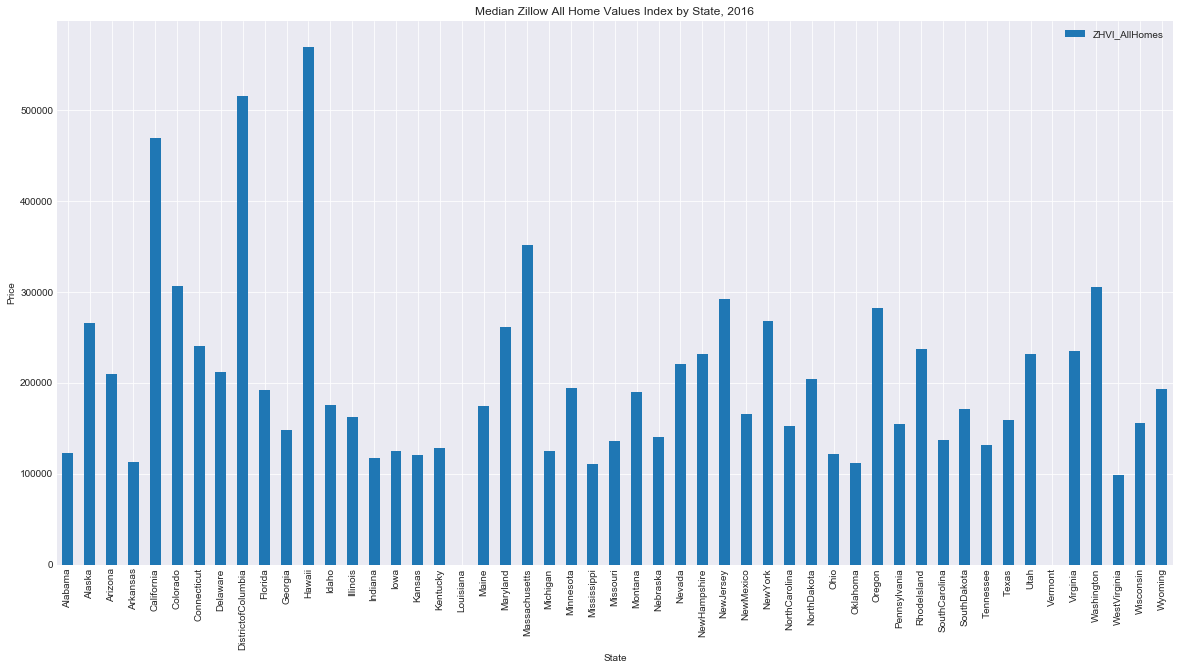

In [28]:
plt.figure(figsize=(20,10))
xx = dfstate[dfstate.Date.dt.year==2016].groupby('RegionName')['ZHVI_AllHomes'].median().plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Price")
plt.title("Median Zillow All Home Values Index by State, 2016")
plt.legend()
plt.show()

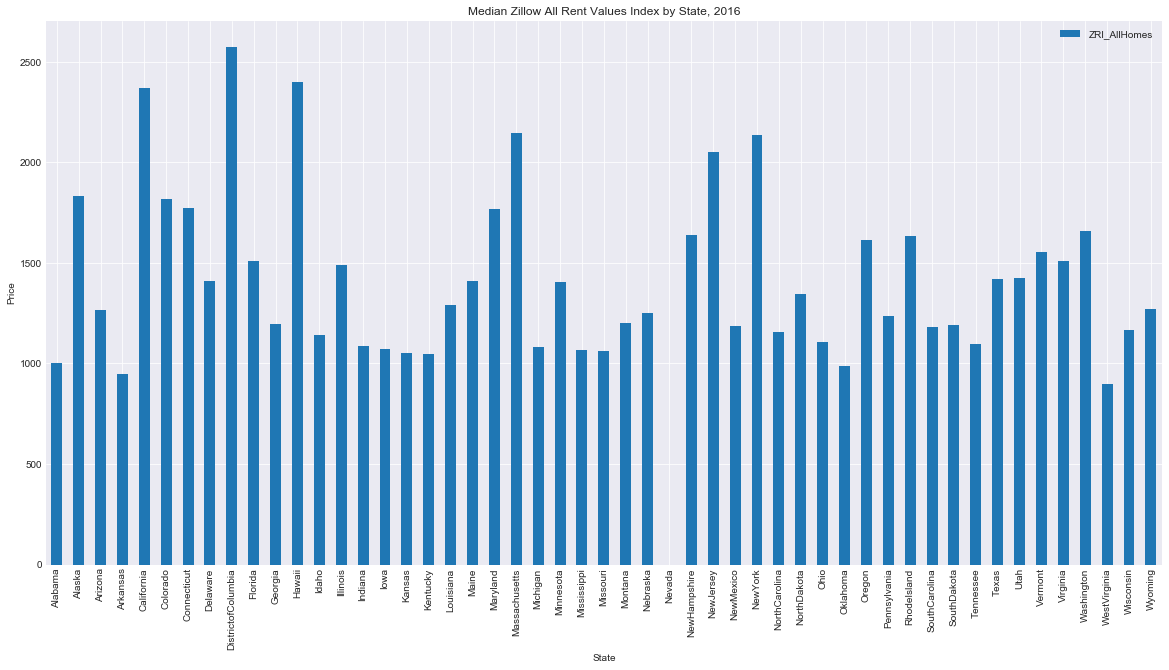

In [29]:
plt.figure(figsize=(20,10))
xx = dfstate[dfstate.Date.dt.year==2016].groupby('RegionName')['ZRI_AllHomes'].median().plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Price")
plt.title("Median Zillow All Rent Values Index by State, 2016")
plt.legend()
plt.show()

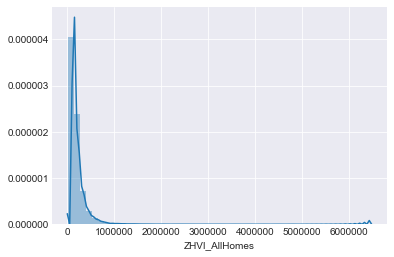

In [30]:
# Dist plot of ZHVI_AllHomes values in our regression prep data
sns.distplot(newdf['ZHVI_AllHomes'].dropna())

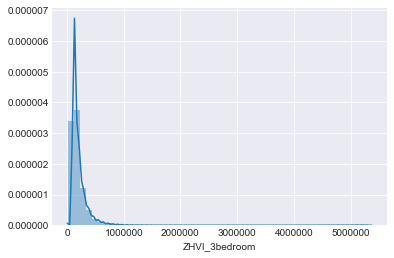

In [31]:
sns.distplot(newdf['ZHVI_3bedroom'].dropna())

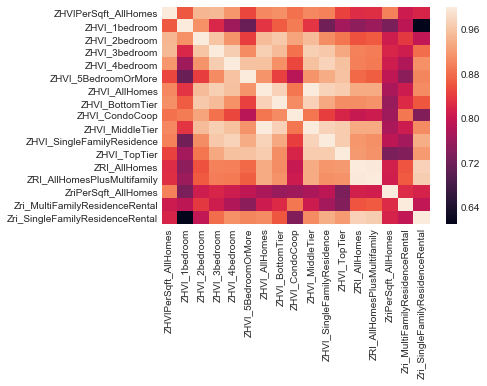

In [32]:
sns.heatmap(newdf.corr())

In [33]:
newdf.corr()

ZHVIPerSqft_AllHomes  ZHVI_1bedroom  ZHVI_2bedroom  ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  ZHVI_AllHomes  ZHVI_BottomTier  ZHVI_CondoCoop  ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental
ZHVIPerSqft_AllHomes                         1.000000       0.862709       0.946175       0.948298       0.916039             0.850007       0.903236         0.909853        0.883669         0.903354                    0.896735      0.847380      0.827572                     0.828010             0.896908                        0.805958                         0.817231
ZHVI_1bedroom                                0.862709       1.000000       0.911369       0.820083       0.762735             0.715547       0.834225         0.866910        0.891860         0.834225                    0.723406      0.766937      0.749441                     0.761489             0.730491                        0.792012                         0.609446
ZHVI_2bedroom                                0.946175       0.911369       1.000000       0.959549       0.914339             0.842035       0.952483         0.964836        0.929182         0.952490                    0.907408      0.888011      0.858548                     0.865101             0.806455                        0.838099                         0.794050
ZHVI_3bedroom                                0.948298       0.820083       0.959549       1.000000       0.968660             0.906479       0.970779         0.951716        0.883574         0.970598                    0.963909      0.932846      0.896348                     0.893510             0.819141                        0.807324                         0.880844
ZHVI_4bedroom                                0.916039       0.762735       0.914339       0.968660       1.000000             0.958069       0.957191         0.910782        0.850122         0.956918                    0.975336      0.956844      0.895788                     0.890184             0.806791                        0.779838                         0.911298
ZHVI_5BedroomOrMore                          0.850007       0.715547       0.842035       0.906479       0.958069             1.000000       0.914085         0.845400        0.786428         0.913922                    0.936661      0.958167      0.876683                     0.868599             0.792911                        0.747640                         0.902208
ZHVI_AllHomes                                0.903236       0.834225       0.952483       0.970779       0.957191             0.914085       1.000000         0.973643        0.887952         1.000000                    0.974842      0.966727      0.935258                     0.935459             0.773627                        0.805632                         0.906196
ZHVI_BottomTier                              0.909853       0.866910       0.964836       0.951716       0.910782             0.845400       0.973643         1.000000        0.906359         0.973661                    0.932590      0.908190      0.907280                     0.911568             0.758718                        0.823185                         0.861462
ZHVI_CondoCoop                               0.883669       0.891860       0.929182       0.883574       0.850122             0.786428       0.887952         0.906359        1.000000         0.887984                    0.841575      0.817127      0.800668                     0.805107             0.762495                        0.889159                         0.737200
ZHVI_MiddleTier                              0.903354       0.834225       0.952490       0.970598       0.956918             0.913922       1.000000         0.973661        0.887984         1.000000                    0.974885      0.966596      0.934797                     0.934899             0.774598                  

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import datasets, neighbors, metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import cross_validation

C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
usregdata2['Month'] = usregdata2.Date.dt.month

In [36]:
usregdata2['Year'] = usregdata2.Date.dt.year

In [37]:
month_dummies = pd.get_dummies(usregdata2.Month, prefix='month')

In [38]:
month_dummies.drop('month_1', axis=1, inplace=True)

In [39]:
dfdf = pd.concat([usregdata2, month_dummies], axis=1)

In [40]:
newdf = dfdf

In [41]:
geogdata['Month'] = geogdata.Date.dt.month
geogdata['Year'] = geogdata.Date.dt.year
month_dummies = pd.get_dummies(geogdata.Month, prefix='month')
month_dummies.drop('month_1', axis=1, inplace=True)
dfdf = pd.concat([geogdata, month_dummies], axis=1)
geogdata = dfdf

In [42]:
trainingdata = newdf[['Date','ZRI_AllHomes', 'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','ZHVI_AllHomes']]

In [43]:
trainingdata = trainingdata.dropna()

In [44]:
training_data,holdout = train_test_split(trainingdata,shuffle=True,test_size=0.10,random_state=123)

In [45]:
folds = 5

# Number of rows in your dataframe
n = training_data.shape[0]

kf = cross_validation.KFold(len(training_data), n_folds=5, shuffle=True,random_state=123)

In [46]:
feature_cols = ['ZRI_AllHomes', 'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']

In [47]:
X = training_data[feature_cols]
y = training_data['ZHVI_AllHomes']
# instantiate and fit your X and y datasets
lr = LinearRegression()

scores = []
mse_values = []
mae_values = []
rmse_values = []
n= 0 
# Fill-in the kfolds-loop:

for train,test in kf:
    # Set up your training and testing sets
    x_train = X.iloc[train]
    x_test = X.iloc[test]
    y_train = y.iloc[train]
    y_true = y.iloc[test]
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    
    # Make Predictions
    y_preds = lr.predict(x_test)
    
    # Score your predictions vs. your true values using mean_squared_error
    fold_score = mean_squared_error(y_true,y_preds)
    
    # Append your score 
    scores.append(lr.score(x_test, y_true))
    mse_values.append(metrics.mean_squared_error(y_true,y_preds))
    mae_values.append(metrics.mean_absolute_error(y_true,y_preds))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y_true,y_preds)))
    
    n+=1
    print('Model', n)
    print('MSE:', mse_values[n-1])
    print('MAE:', mae_values[n-1])
    print('RMSE:', np.sqrt(mse_values[n-1]))
    print('R2:', scores[n-1])

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds:', np.mean(mse_values))
print('Mean of MAE for all folds:', np.mean(mae_values))
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))

('Model', 1)
('MSE:', 6511463.8433675161)
('MAE:', 1955.48252150851)
('RMSE:', 2551.7570110352426)
('R2:', 0.93712425506438013)
('Model', 2)
('MSE:', 25813402.806366529)
('MAE:', 4007.7228157289055)
('RMSE:', 5080.6892058427002)
('R2:', 0.70186040906651614)
('Model', 3)
('MSE:', 15551136.934756339)
('MAE:', 3152.2882598569327)
('RMSE:', 3943.4929865230315)
('R2:', 0.87336132082148965)
('Model', 4)
('MSE:', 14591026.776289226)
('MAE:', 2991.1627551688994)
('RMSE:', 3819.820254447744)
('R2:', 0.81544184138909737)
('Model', 5)
('MSE:', 12766063.477076013)
('MAE:', 2779.0423739753728)
('RMSE:', 3572.9628429464547)
('R2:', 0.83488825072223705)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 15046618.767571125)
('Mean of MAE for all folds:', 2977.139745247724)
('Mean of RMSE for all folds:', 3793.7444601590346)
('Mean of R2 for all folds:', 0.832535215412744)


In [48]:
print(pd.Series(list(zip(feature_cols, lr.coef_))))

0     (ZRI_AllHomes, 250.291636482)
1         (month_2, -777.332048077)
2          (month_3, 1029.59170892)
3          (month_4, 1637.93588905)
4          (month_5, 899.603760296)
5          (month_6, 176.383707618)
6          (month_7, 642.953162124)
7           (month_8, 1276.6753441)
8         (month_9, -210.824655899)
9         (month_10, 671.258375591)
10        (month_11, 836.545673357)
11        (month_12, 560.408291075)
dtype: object


In [49]:
lr.intercept_

-148536.26312687941

In [50]:
feature_cols = ['ZRI_AllHomes']

In [51]:
X = training_data[feature_cols]
y = training_data['ZHVI_AllHomes']
# instantiate and fit your X and y datasets
lr = LinearRegression()

scores = []
mse_values = []
mae_values = []
rmse_values = []
n= 0 
# Fill-in the kfolds-loop:

for train,test in kf:
    # Set up your training and testing sets
    x_train = X.iloc[train]
    x_test = X.iloc[test]
    y_train = y.iloc[train]
    y_true = y.iloc[test]
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    
    # Make Predictions
    y_preds = lr.predict(x_test)
    
    # Score your predictions vs. your true values using mean_squared_error
    fold_score = mean_squared_error(y_true,y_preds)
    
    # Append your score 
    scores.append(lr.score(x_test, y_true))
    mse_values.append(metrics.mean_squared_error(y_true,y_preds))
    mae_values.append(metrics.mean_absolute_error(y_true,y_preds))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y_true,y_preds)))
    
    n+=1
    print('Model', n)
    print('MSE:', mse_values[n-1])
    print('MAE:', mae_values[n-1])
    print('RMSE:', np.sqrt(mse_values[n-1]))
    print('R2:', scores[n-1])

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds:', np.mean(mse_values))
print('Mean of MAE for all folds:', np.mean(mae_values))
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))

('Model', 1)
('MSE:', 3611967.4235716807)
('MAE:', 1366.5071087351419)
('RMSE:', 1900.5176725228525)
('R2:', 0.96512226007803348)
('Model', 2)
('MSE:', 9174943.1894433461)
('MAE:', 2218.4108882749611)
('RMSE:', 3029.0168684646419)
('R2:', 0.89403125849553078)
('Model', 3)
('MSE:', 13241543.754379435)
('MAE:', 2680.8902707665866)
('RMSE:', 3638.8932045856245)
('R2:', 0.89216919519297266)
('Model', 4)
('MSE:', 9456265.0808700882)
('MAE:', 2621.681837539043)
('RMSE:', 3075.1040764289733)
('R2:', 0.8803901262453987)
('Model', 5)
('MSE:', 12278788.344641669)
('MAE:', 2707.5477364310727)
('RMSE:', 3504.1102072625613)
('R2:', 0.84119049492149711)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 9552701.5585812442)
('Mean of MAE for all folds:', 2319.007568349361)
('Mean of RMSE for all folds:', 3029.528405852931)
('Mean of R2 for all folds:', 0.89458066698668648)


In [52]:
print(pd.Series(list(zip(feature_cols, lr.coef_))))

0    (ZRI_AllHomes, 251.265188864)
dtype: object


In [53]:
lr.intercept_

-149240.20624486502

               ZRI_AllHomes  ZHVI_AllHomes
ZRI_AllHomes       1.000000       0.956828
ZHVI_AllHomes      0.956828       1.000000
Axes(0.125,0.125;0.62x0.755)


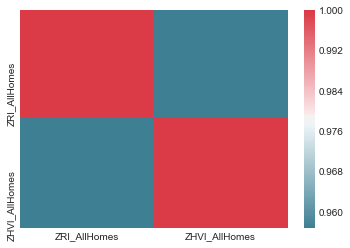

In [54]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = trainingdata[['ZRI_AllHomes', 'ZHVI_AllHomes']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

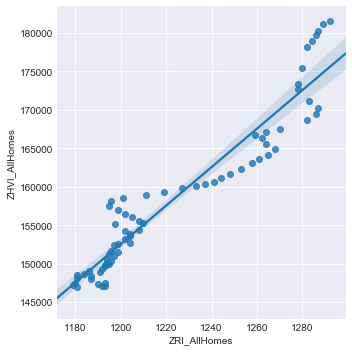

In [55]:
sns.lmplot(x='ZRI_AllHomes', y='ZHVI_AllHomes', data=training_data)

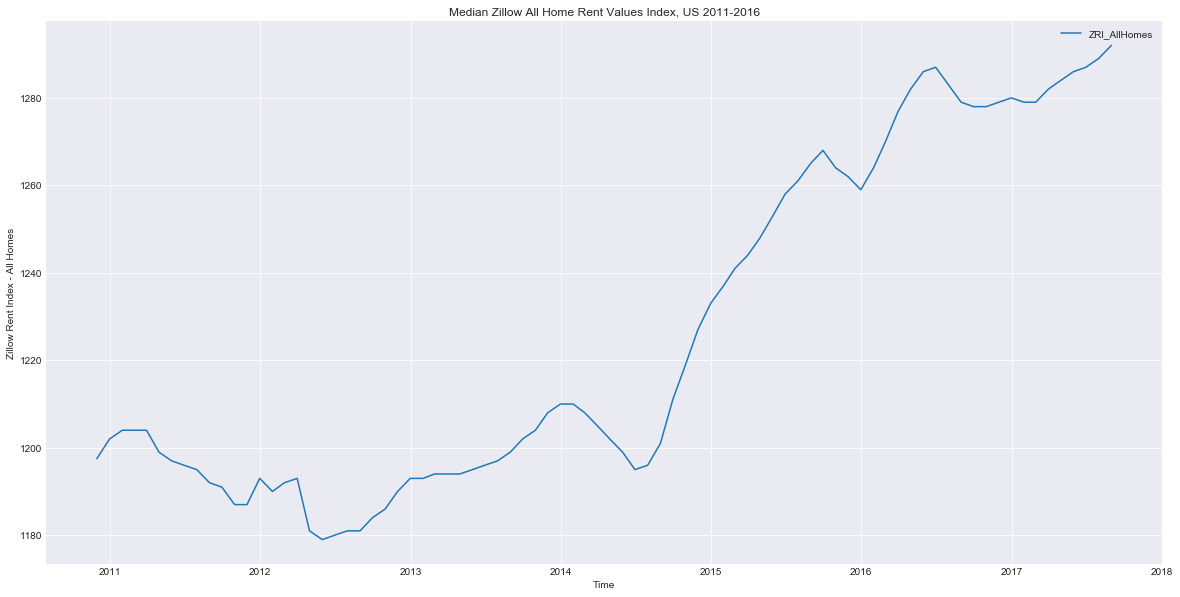

In [56]:
plt.figure(figsize=(20,10))
plt.plot(newdf['Date'],newdf['ZRI_AllHomes'])
plt.xlabel("Time")
plt.ylabel("Zillow Rent Index - All Homes")
plt.title("Median Zillow All Home Rent Values Index, US 2011-2016")
plt.legend()
plt.show()

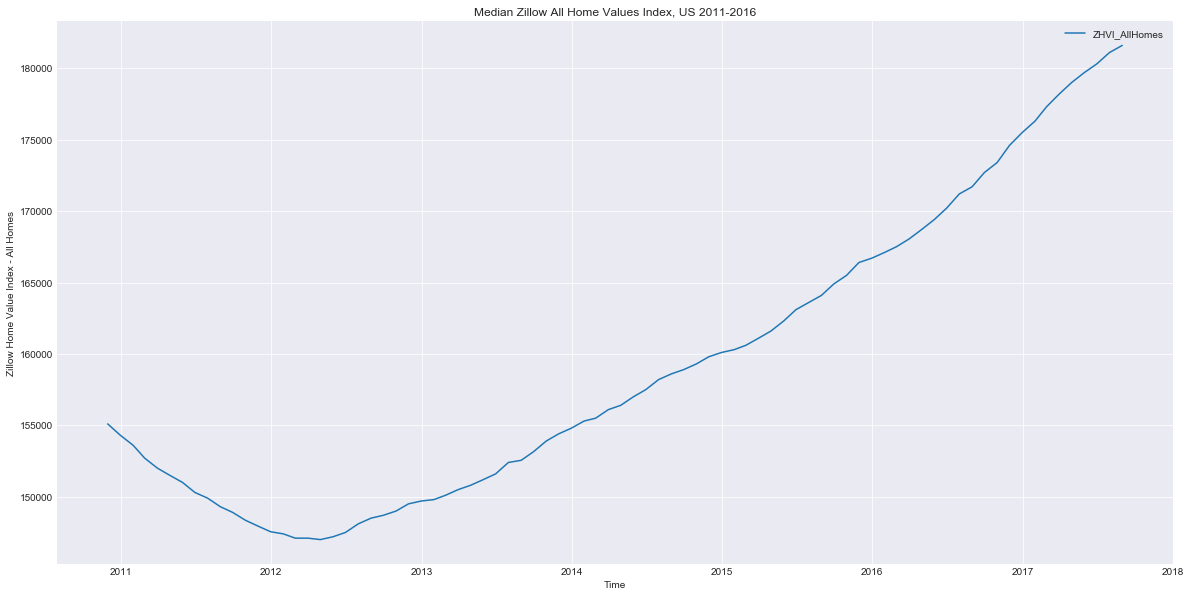

In [57]:
plt.figure(figsize=(20,10))
plt.plot(newdf['Date'],newdf['ZHVI_AllHomes'])
plt.xlabel("Time")
plt.ylabel("Zillow Home Value Index - All Homes")
plt.title("Median Zillow All Home Values Index, US 2011-2016")
plt.legend()
plt.show()

From the regression results and visualizations above, I can already tell that the two features, home value and rental price, are quite correlated. There are a few "imbedded" disadvantages to using time-series housing data for OLS regression analysis. 1) Property values naturally increase over time, due to inflation. 2) Property values, especially rental values, are susceptible to seasonality. 3) The assumptions for OLS, such as i.i.d, are violated. I suspect the unusually high R2 scores stem from multicollinearity of the two values. 

The risk for omitted variable bias is exceptionally high for home value prices, as one can make a reasonably "good" prediction by simply assuming prices will increase at some constant rate. I include a seasonal dummy, but this is likely not sufficient to account for OVB.

For the two models I am considering, ZHVI and ZRI for All Homes and ZHVI and ZRI per sq foot, I will instead regress on the first derivative (% change) to analyze their relationship.            

In [58]:
newdf['ZRI_AllHomes_Prime'] = newdf.ZRI_AllHomes.pct_change()
newdf['ZHVI_AllHomes_Prime'] = newdf.ZHVI_AllHomes.pct_change()
newdf['ZRIPerSqft_AllHomes_Prime'] = newdf.ZriPerSqft_AllHomes.pct_change()
newdf['ZHVIPerSqft_AllHomes_Prime'] = newdf.ZHVIPerSqft_AllHomes.pct_change()

# https://bugra.github.io/work/notes/2014-06-13/first-second-derivative-convolution-quadratic-fitting-and-all-that-via-MCMC/

In [59]:
geogdata['ZRI_AllHomes_Prime'] = geogdata.groupby('RegionName')['ZRI_AllHomes'].pct_change()
geogdata['ZHVI_AllHomes_Prime'] = geogdata.groupby('RegionName')['ZHVI_AllHomes'].pct_change()
geogdata['ZRIPerSqft_AllHomes_Prime'] = geogdata.groupby('RegionName')['ZriPerSqft_AllHomes'].pct_change()
geogdata['ZHVIPerSqft_AllHomes_Prime'] = geogdata.groupby('RegionName')['ZHVIPerSqft_AllHomes'].pct_change()

# https://stackoverflow.com/questions/23749342/how-to-create-rolling-percentage-for-groupby-dataframe

In [60]:
newdf = newdf.dropna()

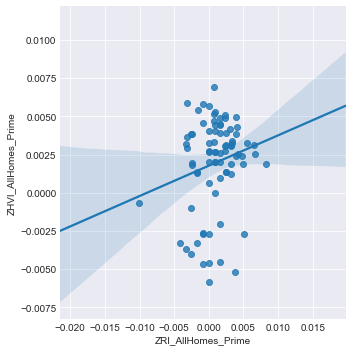

In [61]:
sns.lmplot(x='ZRI_AllHomes_Prime', y='ZHVI_AllHomes_Prime', data=newdf)

In [62]:
trainingdata = newdf[['Date','ZRI_AllHomes_Prime', 'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','ZHVI_AllHomes_Prime','ZHVI_AllHomes']]
trainingdata = trainingdata.dropna()
training_data,holdout = train_test_split(trainingdata,shuffle=True,test_size=0.10,random_state=123)
folds = 5

# Number of rows in your dataframe
n = training_data.shape[0]

kf = cross_validation.KFold(len(training_data), n_folds=5, shuffle=True,random_state=123)

In [63]:
feature_cols = ['ZRI_AllHomes_Prime', 'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']

In [64]:
X = training_data[feature_cols]
y = training_data['ZHVI_AllHomes_Prime']
# instantiate and fit your X and y datasets
lr = LinearRegression()

scores = []
mse_values = []
mae_values = []
rmse_values = []
n= 0 
# Fill-in the kfolds-loop:

for train,test in kf:
    # Set up your training and testing sets
    x_train = X.iloc[train]
    x_test = X.iloc[test]
    y_train = y.iloc[train]
    y_true = y.iloc[test]
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    
    # Make Predictions
    y_preds = lr.predict(x_test)
    
    # Score your predictions vs. your true values using mean_squared_error
    fold_score = mean_squared_error(y_true,y_preds)
    
    # Append your score 
    scores.append(lr.score(x_test, y_true))
    mse_values.append(metrics.mean_squared_error(y_true,y_preds))
    mae_values.append(metrics.mean_absolute_error(y_true,y_preds))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y_true,y_preds)))
    
    n+=1
    print('Model', n)
    print('MSE:', mse_values[n-1])
    print('MAE:', mae_values[n-1])
    print('RMSE:', np.sqrt(mse_values[n-1]))
    print('R2:', scores[n-1])

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds:', np.mean(mse_values))
print('Mean of MAE for all folds:', np.mean(mae_values))
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))

('Model', 1)
('MSE:', 6.1468428009269704e-06)
('MAE:', 0.0020083466337445072)
('RMSE:', 0.0024792827190393131)
('R2:', -1.0085577653585762)
('Model', 2)
('MSE:', 1.3515960859206022e-05)
('MAE:', 0.002770669736730054)
('RMSE:', 0.003676405970401803)
('R2:', -0.21850444592445006)
('Model', 3)
('MSE:', 8.3274518238887025e-06)
('MAE:', 0.0023740513655304413)
('RMSE:', 0.002885732458820239)
('R2:', 0.23964841215588248)
('Model', 4)
('MSE:', 1.0122000804342413e-05)
('MAE:', 0.0023202988589339528)
('RMSE:', 0.0031815092023035878)
('R2:', -0.035671446085745462)
('Model', 5)
('MSE:', 1.2867723488071104e-05)
('MAE:', 0.0028841323198191748)
('RMSE:', 0.0035871609230798533)
('R2:', -0.42238738570942824)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 1.0195995955287043e-05)
('Mean of MAE for all folds:', 0.0024714997829516265)
('Mean of RMSE for all folds:', 0.0031620182547289592)
('Mean of R2 for all folds:', -0.28909452618446346)


In [65]:
lm = lr.fit(newdf[feature_cols], newdf['ZHVI_AllHomes_Prime'])
print("~~~~ Single Model ~~~~")
print('MSE of single model:', metrics.mean_squared_error(newdf['ZHVI_AllHomes_Prime'], lm.predict(newdf[feature_cols])))
print('R2: ', lm.score(newdf[feature_cols], newdf['ZHVI_AllHomes_Prime']))
print('RMSE of single model:', np.sqrt(metrics.mean_squared_error(newdf['ZHVI_AllHomes_Prime'], lm.predict(newdf[feature_cols]))))

~~~~ Single Model ~~~~
('MSE of single model:', 7.7791458594540446e-06)
('R2: ', 0.12824077041790627)
('RMSE of single model:', 0.0027891120198826804)


In [66]:
X_train = training_data[feature_cols]
y_train = training_data['ZHVI_AllHomes_Prime']

x_holdout = holdout[feature_cols]
y_holdout = holdout['ZHVI_AllHomes_Prime']

In [67]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
holdout_preds = lr.predict(x_holdout)
MAE_score = metrics.mean_squared_error(y_holdout,holdout_preds)
MSE_score = metrics.mean_absolute_error(y_holdout,holdout_preds)
RMSE_score = np.sqrt(metrics.mean_squared_error(y_holdout,holdout_preds))
R2_score = lr.score(x_holdout, y_holdout)

print('MSE:', MSE_score)
print('MAE:', MAE_score)
print('RMSE:', RMSE_score)
print('R2:', R2_score)

('MSE:', 0.0025641019065439953)
('MAE:', 1.0474162991217262e-05)
('RMSE:', 0.0032363811566651513)
('R2:', -0.38655353283197469)


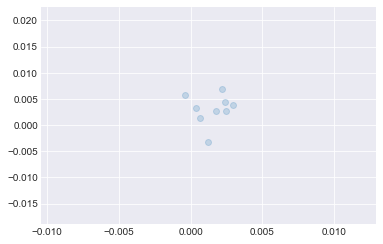

In [69]:
plt.scatter(holdout_preds, y_holdout, alpha=0.2)

There is a stark difference between my k-folds iterated training model and singular training model. For my iterated version, I have quite variant R2 scores across each fold (one was -1.0, while another was 0.23), which gave an average R2 score of -0.28 (-28%). My singular model gave a R2 score of around 0.13 (13%). However, my RMSE scores were similar, each at around 0.003 and 0.0027, which should be interpreted as +/- 2/3% points. When scored against my holdout set, it performed worse -- a RMSE of 0.0032 and a R2 of -0.38 (38%), indicating that my training model overfits the data. I am also suspect that my n is affecting my analysis -- at 81 data points, my dataset has been constrained due to the availability of rent data.  

I will now try the same regression features with my bigger, panel dataset.

NOTE: After consulting with Joseph, I have realized that using k-folds on time-series data is non-sensical. I will have to come back to this and revise my results. 

In [70]:
geogdata = geogdata.dropna(subset=['ZRI_AllHomes'], how='any')

In [71]:
geogdata

RegionName         City     County State       Date  ZHVIPerSqft_AllHomes  ZHVI_1bedroom  ZHVI_2bedroom  ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  ZHVI_AllHomes  ZHVI_BottomTier  ZHVI_CondoCoop  ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  Month  Year  month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12  ZRI_AllHomes_Prime  ZHVI_AllHomes_Prime  ZRIPerSqft_AllHomes_Prime  ZHVIPerSqft_AllHomes_Prime
175      oak_grovechristianky    Oak Grove  Christian    KY 2010-11-30                  80.0            NaN        65500.0        86800.0            NaN                  NaN        88800.0          74700.0             NaN          88800.0                     88800.0      111500.0         796.0                        793.0                0.728                           671.0                            794.0     11  2010        0        0        0        0        0        0        0        0         0         1         0                 NaN                  NaN                        NaN                         NaN
176      oak_grovechristianky    Oak Grove  Christian    KY 2010-12-31                  80.0            NaN        66400.0        86900.0            NaN                  NaN        88400.0          74500.0             NaN          88400.0                     88400.0      111400.0         798.0                        795.0                0.730                           677.0                            795.0     12  2010        0        0        0        0        0        0        0        0         0         0         1            0.002513            -0.004505                   0.002747                    0.000000
177      oak_grovechristianky    Oak Grove  Christian    KY 2011-01-31                  80.0            NaN        66500.0        86800.0            NaN                  NaN        88100.0          73700.0             NaN          88100.0                     88100.0      111800.0         800.0                        796.0                0.732                           682.0                            797.0      1  2011        0        0        0        0        0        0        0        0         0         0         0            0.002506            -0.003394                   0.002740                    0.000000
178      oak_grovechristianky    Oak Grove  Christian    KY 2011-02-28                  79.0            NaN        66100.0        86700.0            NaN                  NaN        87600.0          72900.0             NaN          87600.0                     87600.0      112400.0         802.0                        794.0                0.732                           681.0                            795.0      2  2011        1        0        0        0        0        0        0        0         0         0         0            0.002500            -0.005675                   0.000000                   -0.012500
179      oak_grovechristianky    Oak Grove  Christian    KY 2011-03-31                  79.0            NaN        65700.0        86400.0            NaN                  NaN        87400.0          72400.0             NaN          87400.0                     87400.0      112900.0         802.0                        793.0                0.734                           682.0                            793.0      3  2011        0        1        0        0        0        0        0        0         0         0         0            0.000000            -0.002283                   0.002732                    0.000000
180      oak_grovechristianky    Oak Grove  Christian    KY 2011-04-30                  79.0            NaN        65700.0        86300.0            NaN                  NaN        87900.0          72400.0             NaN          87900.0                     87900.0      113300.0         805.

In [72]:
trainingdata = geogdata[['Date','ZRI_AllHomes_Prime', 'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','ZHVI_AllHomes_Prime']]
trainingdata = trainingdata.dropna()
training_data,holdout = train_test_split(trainingdata,shuffle=True,test_size=0.10,random_state=123)
folds = 5

# Number of rows in your dataframe
n = training_data.shape[0]

kf = cross_validation.KFold(len(training_data), n_folds=5, shuffle=True,random_state=123)

In [73]:
feature_cols = ['ZRI_AllHomes_Prime', 'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']

X = training_data[feature_cols]
y = training_data['ZHVI_AllHomes_Prime']
# instantiate and fit your X and y datasets
lr = LinearRegression()

scores = []
mse_values = []
mae_values = []
rmse_values = []
n= 0 
# Fill-in the kfolds-loop:

for train,test in kf:
    # Set up your training and testing sets
    x_train = X.iloc[train]
    x_test = X.iloc[test]
    y_train = y.iloc[train]
    y_true = y.iloc[test]
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    
    # Make Predictions
    y_preds = lr.predict(x_test)
    
    # Score your predictions vs. your true values using mean_squared_error
    fold_score = mean_squared_error(y_true,y_preds)
    
    # Append your score 
    scores.append(lr.score(x_test, y_true))
    mse_values.append(metrics.mean_squared_error(y_true,y_preds))
    mae_values.append(metrics.mean_absolute_error(y_true,y_preds))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y_true,y_preds)))
    
    n+=1
    print('Model', n)
    print('MSE:', mse_values[n-1])
    print('MAE:', mae_values[n-1])
    print('RMSE:', np.sqrt(mse_values[n-1]))
    print('R2:', scores[n-1])

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds:', np.mean(mse_values))
print('Mean of MAE for all folds:', np.mean(mae_values))
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))

('Model', 1)
('MSE:', 7.9527001108850438e-05)
('MAE:', 0.0064717511898182188)
('RMSE:', 0.0089177912685176955)
('R2:', 0.0080327425490813731)
('Model', 2)
('MSE:', 7.9210099856818732e-05)
('MAE:', 0.0064633047587455148)
('RMSE:', 0.0089000056099318679)
('R2:', 0.0071234328973432967)
('Model', 3)
('MSE:', 7.8901055448344479e-05)
('MAE:', 0.0064441455560091268)
('RMSE:', 0.0088826266075043639)
('R2:', 0.0077997228582682432)
('Model', 4)
('MSE:', 7.8807924057855251e-05)
('MAE:', 0.0064553366356608667)
('RMSE:', 0.0088773827256604897)
('R2:', 0.0076550841814477799)
('Model', 5)
('MSE:', 7.867410328836118e-05)
('MAE:', 0.0064542779164826498)
('RMSE:', 0.0088698423485629764)
('R2:', 0.0080141404829783269)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 7.9024036752046021e-05)
('Mean of MAE for all folds:', 0.0064577632113432763)
('Mean of RMSE for all folds:', 0.0088895297120354794)
('Mean of R2 for all folds:', 0.007725024593823804)


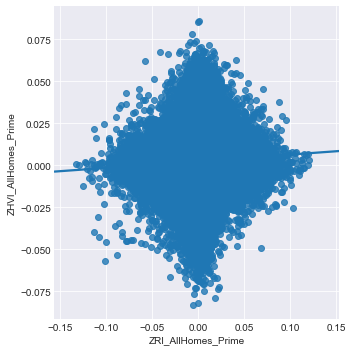

In [74]:
sns.lmplot(x='ZRI_AllHomes_Prime', y='ZHVI_AllHomes_Prime', data=geogdata)

In [76]:
geogdata.drop(labels=['ZHVI_1bedroom','ZHVI_2bedroom','ZHVI_3bedroom','ZHVI_4bedroom','ZHVI_5BedroomOrMore','ZHVI_BottomTier','ZHVI_CondoCoop','ZHVI_MiddleTier','ZHVI_SingleFamilyResidence','ZHVI_TopTier','ZRI_AllHomesPlusMultifamily','Zri_MultiFamilyResidenceRental','Zri_SingleFamilyResidenceRental'],axis=1,inplace=True)

In [77]:
xxyyxx = geogdata.dropna(subset=['ZHVI_AllHomes_Prime','ZRI_AllHomes_Prime',], how='any')

In [78]:
lm = lr.fit(xxyyxx[feature_cols] , xxyyxx['ZHVI_AllHomes_Prime'])

In [79]:
print("~~~~ Single Model ~~~~")
print('MSE of single model:', metrics.mean_squared_error(xxyyxx['ZHVI_AllHomes_Prime'], lm.predict(xxyyxx[feature_cols])))
print('R2: ', lm.score(xxyyxx[feature_cols], xxyyxx['ZHVI_AllHomes_Prime']))
print('RMSE of single model:', np.sqrt(metrics.mean_squared_error(xxyyxx['ZHVI_AllHomes_Prime'], lm.predict(xxyyxx[feature_cols]))))

~~~~ Single Model ~~~~
('MSE of single model:', 7.9079979332874473e-05)
('R2: ', 0.007802540544489367)
('RMSE of single model:', 0.0088926924681377844)


In [80]:
X_train = training_data[feature_cols]
y_train = training_data['ZHVI_AllHomes_Prime']

x_holdout = holdout[feature_cols]
y_holdout = holdout['ZHVI_AllHomes_Prime']

In [81]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
holdout_preds = lr.predict(x_holdout)
MAE_score = metrics.mean_squared_error(y_holdout,holdout_preds)
MSE_score = metrics.mean_absolute_error(y_holdout,holdout_preds)
RMSE_score = np.sqrt(metrics.mean_squared_error(y_holdout,holdout_preds))
R2_score = lr.score(x_holdout, y_holdout)

print('MSE:', MSE_score)
print('MAE:', MAE_score)
print('RMSE:', RMSE_score)
print('R2:', R2_score)

('MSE:', 0.0064969551448449273)
('MAE:', 7.9619648871797599e-05)
('RMSE:', 0.0089229843030119473)
('R2:', 0.0080221433841362044)


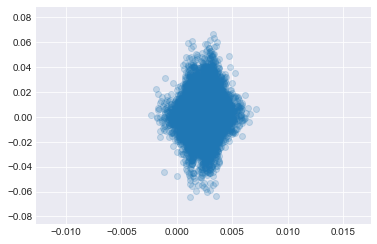

In [83]:
plt.scatter(holdout_preds, y_holdout, alpha=0.2)

My geography panel data does not perform that much better than my US median data. Thankfully, the R2 is positive (barely so), and the RMSE score is better as well. My data sample issue is resolved as I have 1,000,000+ observations, but regardless the relationship is tenuous at best. I have to realize the endogenous issue of geography -- rental prices will not affect property prices the way it does in a metropolitan city as a rural county. This OVB is hard to create a feature out of, as my dataset has encompasses the entire US. I can possibly cut the data into different regions (East, Midwest, etc.) but even then I think it would be hard to model a national relationship.       

In [84]:
trainingdata = newdf[['Date', 'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','ZRIPerSqft_AllHomes_Prime','ZHVIPerSqft_AllHomes_Prime']]

In [85]:
trainingdata = trainingdata.dropna()

In [88]:
training_data,holdout = train_test_split(trainingdata,shuffle=True,test_size=0.10,random_state=123)
folds = 5

# Number of rows in your dataframe
n = training_data.shape[0]

kf = cross_validation.KFold(len(training_data), n_folds=5, shuffle=True,random_state=123)
feature_cols = ['ZRIPerSqft_AllHomes_Prime', 'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']

In [89]:
X = training_data[feature_cols]
y = training_data['ZHVIPerSqft_AllHomes_Prime']
# instantiate and fit your X and y datasets
lr = LinearRegression()

scores = []
mse_values = []
mae_values = []
rmse_values = []
n= 0 
# Fill-in the kfolds-loop:

for train,test in kf:
    # Set up your training and testing sets
    x_train = X.iloc[train]
    x_test = X.iloc[test]
    y_train = y.iloc[train]
    y_true = y.iloc[test]
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    
    # Make Predictions
    y_preds = lr.predict(x_test)
    
    # Score your predictions vs. your true values using mean_squared_error
    fold_score = mean_squared_error(y_true,y_preds)
    
    # Append your score 
    scores.append(lr.score(x_test, y_true))
    mse_values.append(metrics.mean_squared_error(y_true,y_preds))
    mae_values.append(metrics.mean_absolute_error(y_true,y_preds))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y_true,y_preds)))
    
    n+=1
    print('Model', n)
    print('MSE:', mse_values[n-1])
    print('MAE:', mae_values[n-1])
    print('RMSE:', np.sqrt(mse_values[n-1]))
    print('R2:', scores[n-1])

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds:', np.mean(mse_values))
print('Mean of MAE for all folds:', np.mean(mae_values))
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))

('Model', 1)
('MSE:', 4.9917370332155644e-05)
('MAE:', 0.0058331275822060937)
('RMSE:', 0.0070652225960797328)
('R2:', -1.4193071383523521)
('Model', 2)
('MSE:', 4.7053625081804641e-05)
('MAE:', 0.0054177265375912886)
('RMSE:', 0.0068595644965117608)
('R2:', -0.086465007836594499)
('Model', 3)
('MSE:', 1.9067068359471477e-05)
('MAE:', 0.0034112536154283063)
('RMSE:', 0.0043665854348073248)
('R2:', -0.016644621812686999)
('Model', 4)
('MSE:', 2.6983500425513123e-05)
('MAE:', 0.0039500084064311592)
('RMSE:', 0.0051945645077824494)
('R2:', 0.11872002330301679)
('Model', 5)
('MSE:', 3.8631914703368147e-05)
('MAE:', 0.0053612612634282896)
('RMSE:', 0.0062154577227560761)
('R2:', -0.63259459515218031)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 3.6330695780462609e-05)
('Mean of MAE for all folds:', 0.0047946754810170274)
('Mean of RMSE for all folds:', 0.0059402789515874688)
('Mean of R2 for all folds:', -0.4072582679701594)


In [90]:
print(pd.Series(list(zip(feature_cols, lr.coef_))))

0     (ZRIPerSqft_AllHomes_Prime, 0.0256252274783)
1                      (month_2, 0.00505361964157)
2                      (month_3, 0.00671085681077)
3                       (month_4, 0.0118172132157)
4                       (month_5, 0.0094263672737)
5                      (month_6, 0.00645285588458)
6                      (month_7, 0.00806877842947)
7                      (month_8, 0.00610868260313)
8                      (month_9, 0.00958792830397)
9                     (month_10, 0.00872335257576)
10                    (month_11, 0.00503281376624)
11                    (month_12, 0.00964936730436)
dtype: object


In [91]:
lr.intercept_

-0.0050839125345244068

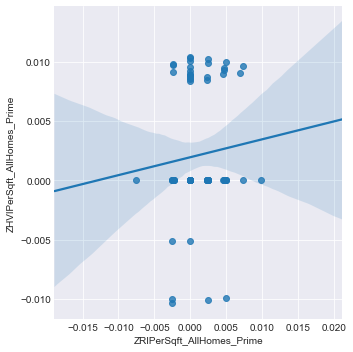

In [92]:
sns.lmplot(x='ZRIPerSqft_AllHomes_Prime', y='ZHVIPerSqft_AllHomes_Prime', data=newdf)

In [93]:
lm = lr.fit(newdf[feature_cols], newdf['ZHVIPerSqft_AllHomes_Prime'])
print("~~~~ Single Model ~~~~")
print('MSE of single model:', metrics.mean_squared_error(newdf['ZHVIPerSqft_AllHomes_Prime'], lm.predict(newdf[feature_cols])))
print('R2: ', lm.score(newdf[feature_cols], newdf['ZHVIPerSqft_AllHomes_Prime']))
print('RMSE of single model:', np.sqrt(metrics.mean_squared_error(newdf['ZHVIPerSqft_AllHomes_Prime'], lm.predict(newdf[feature_cols]))))

~~~~ Single Model ~~~~
('MSE of single model:', 2.3335124471104521e-05)
('R2: ', 0.13666954810064058)
('RMSE of single model:', 0.0048306443122118322)


In [94]:
X_train = training_data[feature_cols]
y_train = training_data['ZHVIPerSqft_AllHomes_Prime']

x_holdout = holdout[feature_cols]
y_holdout = holdout['ZHVIPerSqft_AllHomes_Prime']

lr.fit(X_train,y_train)

holdout_preds = lr.predict(x_holdout)
MAE_score = metrics.mean_squared_error(y_holdout,holdout_preds)
MSE_score = metrics.mean_absolute_error(y_holdout,holdout_preds)
RMSE_score = np.sqrt(metrics.mean_squared_error(y_holdout,holdout_preds))
R2_score = lr.score(x_holdout, y_holdout)

print('MSE:', MSE_score)
print('MAE:', MAE_score)
print('RMSE:', RMSE_score)
print('R2:', R2_score)


('MSE:', 0.0042175879196101381)
('MAE:', 2.3976328636017998e-05)
('RMSE:', 0.004896562941086125)
('R2:', -0.5637788235774317)


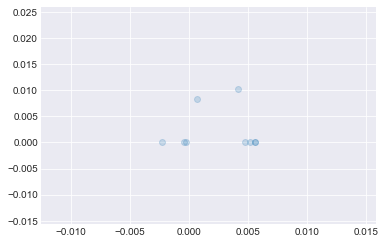

In [95]:
plt.scatter(holdout_preds, y_holdout, alpha=0.2)

In [96]:
residuals = holdout_preds - y_holdout

(array([ 1.,  1.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  4.]),
 array([-0.00776812, -0.0064306 , -0.00509308, -0.00375556, -0.00241804,
        -0.00108052,  0.000257  ,  0.00159452,  0.00293204,  0.00426956,
         0.00560708]),
 <a list of 10 Patch objects>)

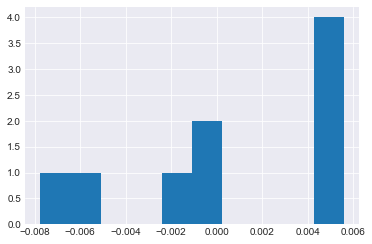

In [97]:
plt.hist(residuals)

I have the same issues as my prior ZHVI All Homes OLS model, if not worse. My R2 score is negative on my holdout score, and my RMSE has also increased by 10 basis points. In fact, my null RMSE performs better than my OLS model, as seen below. My holdout dataset is not a robust dataset to begin with -- taking 10% (the sample size I set in the beginning) of 82 observations only allows me to work with around 8~11 data points. 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([ 0.00238867,  0.00238867,  0.00238867,  0.00238867,  0.00238867,
        0.00238867,  0.00238867,  0.00238867,  0.00238867,  0.00238867,
        0.00238867,  0.00238867,  0.00238867,  0.00238867,  0.00238867,
        0.00238867,  0.00238867,  0.00238867])

In [99]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.0046371065434703176

Given the issues in my OLS regressions and its overall poor results and constraints, I will look to employ a seasonal ARIMA model to predict housing value prices. I will forgo using rental prices due to its lack of observations. Please note that the code will largely be using from the following repo: https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb 

The first step of our ARIMA model is to check if our data is stationary. As seen before, we see that property value is rising over time, except for the dip during the housing recession. We will have to "stationarize" the data, perform ACF and PACF tests to select model parameters, and complete a forecast for 2018.  

In [100]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [101]:
arimadata = pd.merge(crosswalk, df2, on='RegionName')

In [102]:
arimadata = arimadata.groupby('Date').median()
arimadata.head()

ZHVIPerSqft_AllHomes  ZHVI_1bedroom  ZHVI_2bedroom  ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  ZHVI_AllHomes  ZHVI_BottomTier  ZHVI_CondoCoop  ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental
Date                                                                                                                                                                                                                                                                                                                                                         
1996-04-30                  67.0        69700.0        84400.0       104100.0       146550.0             199100.0       103550.0          83200.0         96500.0         103600.0                    105800.0      143100.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-05-31                  67.0        69500.0        84400.0       104400.0       146400.0             199100.0       103650.0          83100.0         96400.0         103750.0                    105900.0      143400.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-06-30                  67.0        69100.0        84500.0       104700.0       146500.0             198100.0       103500.0          82900.0         96600.0         103500.0                    105800.0      142900.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-07-31                  67.0        68800.0        84500.0       104800.0       146500.0             197900.0       103600.0          82800.0         96800.0         103700.0                    105700.0      142800.0           NaN                          NaN                  NaN                             NaN                              NaN
1996-08-31                  67.0        68450.0        84500.0       105100.0       146700.0             197000.0       103900.0          82900.0         96700.0         104000.0                    105900.0      143000.0           NaN                          NaN                  NaN                             NaN                              NaN

In [103]:
arimadata2 = arimadata.dropna(subset=['ZHVI_AllHomes'], how='any')
arimadata2 = arimadata2.reset_index()

In [104]:
arimadata3 = arimadata2[['Date','ZHVI_AllHomes']]

In [105]:
arimadata3.index.name=None
arimadata3.reset_index(inplace=True)
arimadata3.drop(arimadata3.index[256], inplace=True)

C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
import datetime
from dateutil.relativedelta import relativedelta

In [107]:
df = arimadata3.set_index(['Date'])

In [108]:
df.drop(labels=['index'],axis=1,inplace=True)

In [109]:
start = datetime.datetime.strptime("1996-04-30", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,256)]
arimadata3['index'] =date_list
arimadata3.set_index(['index'], inplace=True)
arimadata3.index.name=None

C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


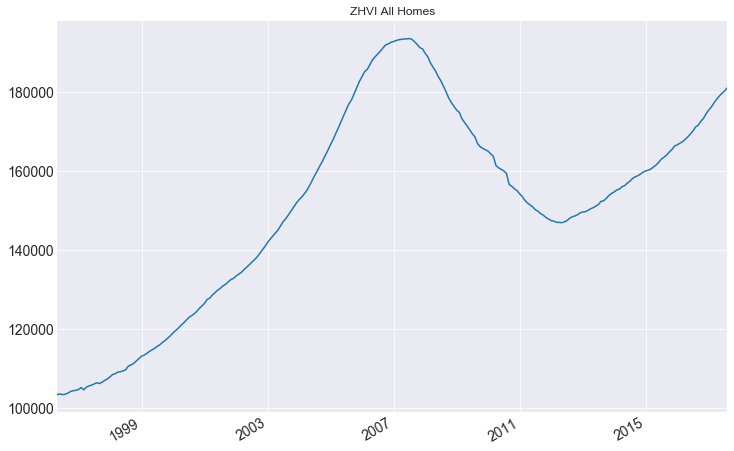

In [110]:
arimadata3.ZHVI_AllHomes.plot(figsize=(12,8), title= 'ZHVI All Homes', fontsize=14)

As seen above, our data is not stationary. The ZHVI increases as time increases. Our visualizations below aid in teasing out seasonal and time effects on our data.

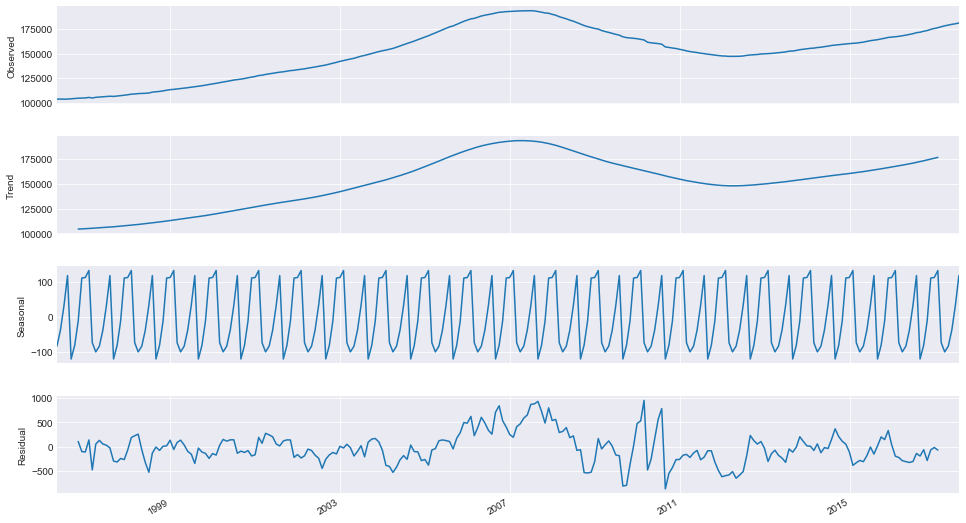

In [111]:
decomposition = seasonal_decompose(arimadata3.ZHVI_AllHomes, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

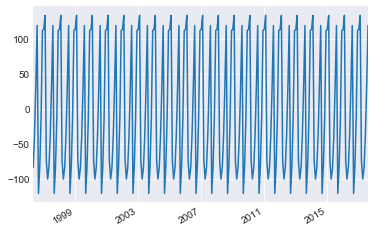

In [112]:
seasonal = decomposition.seasonal 
seasonal.plot()

In [113]:
# define Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 


C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


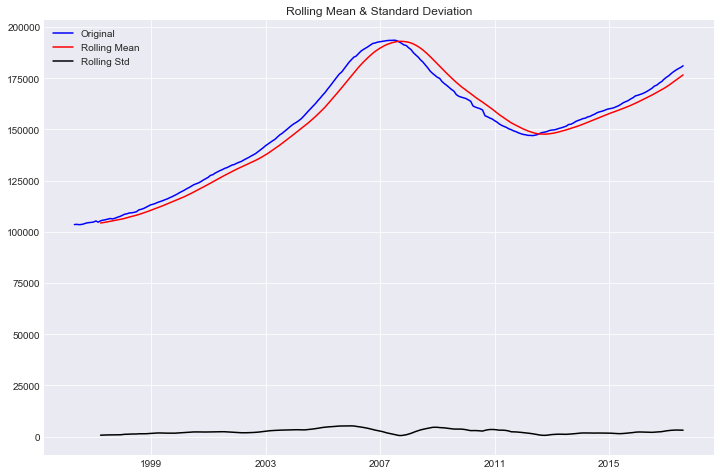

Results of Dickey-Fuller Test:
Test Statistic                  -2.849165
p-value                          0.051587
#Lags Used                       5.000000
Number of Observations Used    250.000000
Critical Value (5%)             -2.873172
Critical Value (1%)             -3.456781
Critical Value (10%)            -2.572969
dtype: float64


In [114]:
# perform test
test_stationarity(arimadata3.ZHVI_AllHomes)

The "quick and dirty" method to calculate for "stationarity" is our test statistic. The more negative this value is, the "the stronger the rejection of the hypothesis that there is a unit root at some level of confidence."(https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)

In other words, if our test statistic is more negative than our critical value, our data is stationary. Our as-is data is not enough, since our test statistic is not more negative than our critical values. We proceed to take the first difference. 

C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


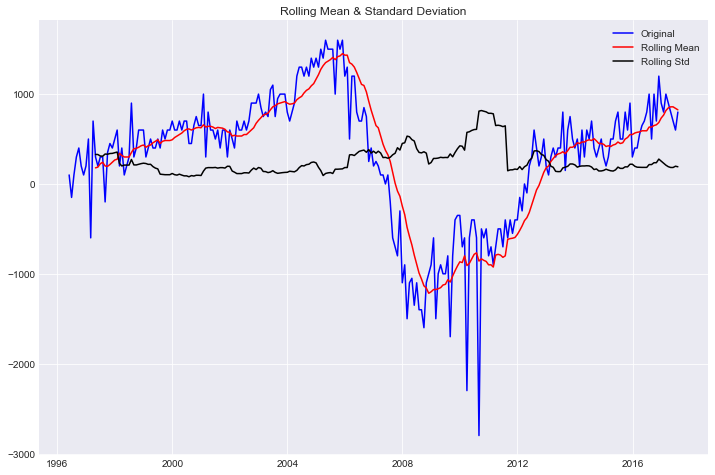

Results of Dickey-Fuller Test:
Test Statistic                  -2.610815
p-value                          0.090783
#Lags Used                      16.000000
Number of Observations Used    238.000000
Critical Value (5%)             -2.873762
Critical Value (1%)             -3.458128
Critical Value (10%)            -2.573283
dtype: float64


In [115]:
arimadata3['first_difference'] = arimadata3.ZHVI_AllHomes - arimadata3.ZHVI_AllHomes.shift(1)  
test_stationarity(arimadata3.first_difference.dropna(inplace=False))

C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


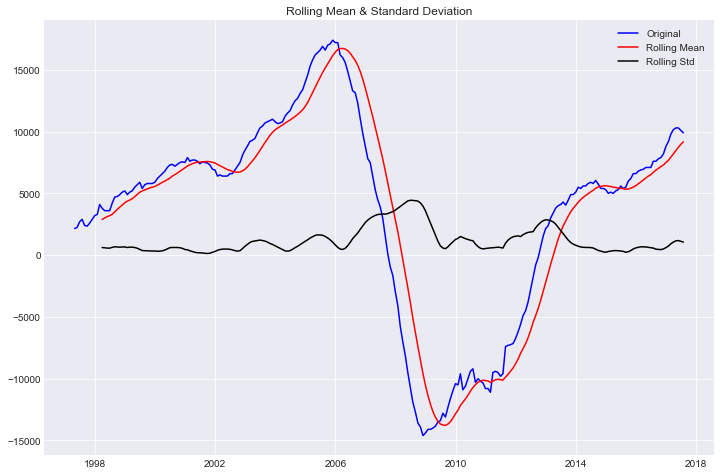

Results of Dickey-Fuller Test:
Test Statistic                  -1.938931
p-value                          0.313974
#Lags Used                      13.000000
Number of Observations Used    230.000000
Critical Value (5%)             -2.874190
Critical Value (1%)             -3.459106
Critical Value (10%)            -2.573512
dtype: float64


In [116]:
arimadata3['seasonal_difference'] = arimadata3.ZHVI_AllHomes - arimadata3.ZHVI_AllHomes.shift(12)  
test_stationarity(arimadata3.seasonal_difference.dropna(inplace=False))

C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\dkang\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


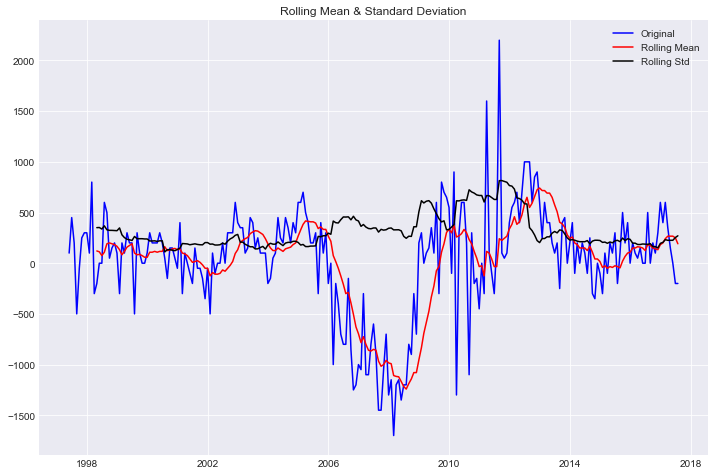

Results of Dickey-Fuller Test:
Test Statistic                  -3.545046
p-value                          0.006903
#Lags Used                      11.000000
Number of Observations Used    231.000000
Critical Value (5%)             -2.874135
Critical Value (1%)             -3.458980
Critical Value (10%)            -2.573482
dtype: float64


In [117]:
arimadata3['seasonal_first_difference'] = arimadata3.first_difference - arimadata3.first_difference.shift(12)  
test_stationarity(arimadata3.seasonal_first_difference.dropna(inplace=False))

Only after taking our first seasonal difference is our dataset sufficiently stationary. Our test statistic is more negative than our critical value at 1%, so we can say with 99% confidence that this transformed data is stationary.  (https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)

In [118]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(arimadata3.seasonal_first_difference.iloc[13:], nlags=20)
lag_pacf = pacf(arimadata3.seasonal_first_difference.iloc[13:], nlags=20, method='ols')

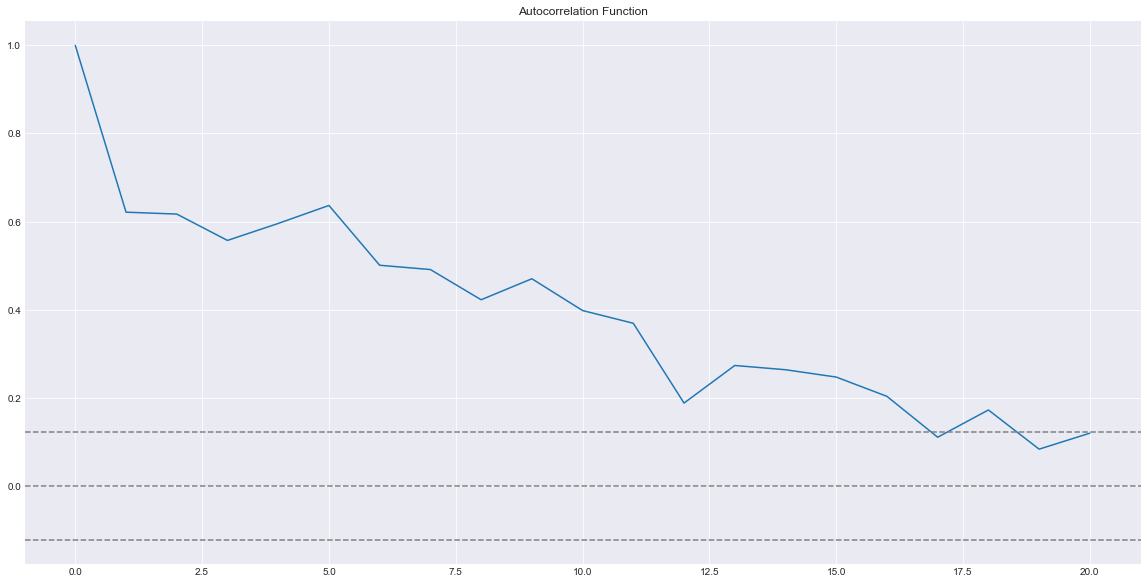

In [119]:
#Plot ACF: 
plt.figure(figsize=(20,10))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(arimadata3.seasonal_first_difference)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(arimadata3.seasonal_first_difference)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

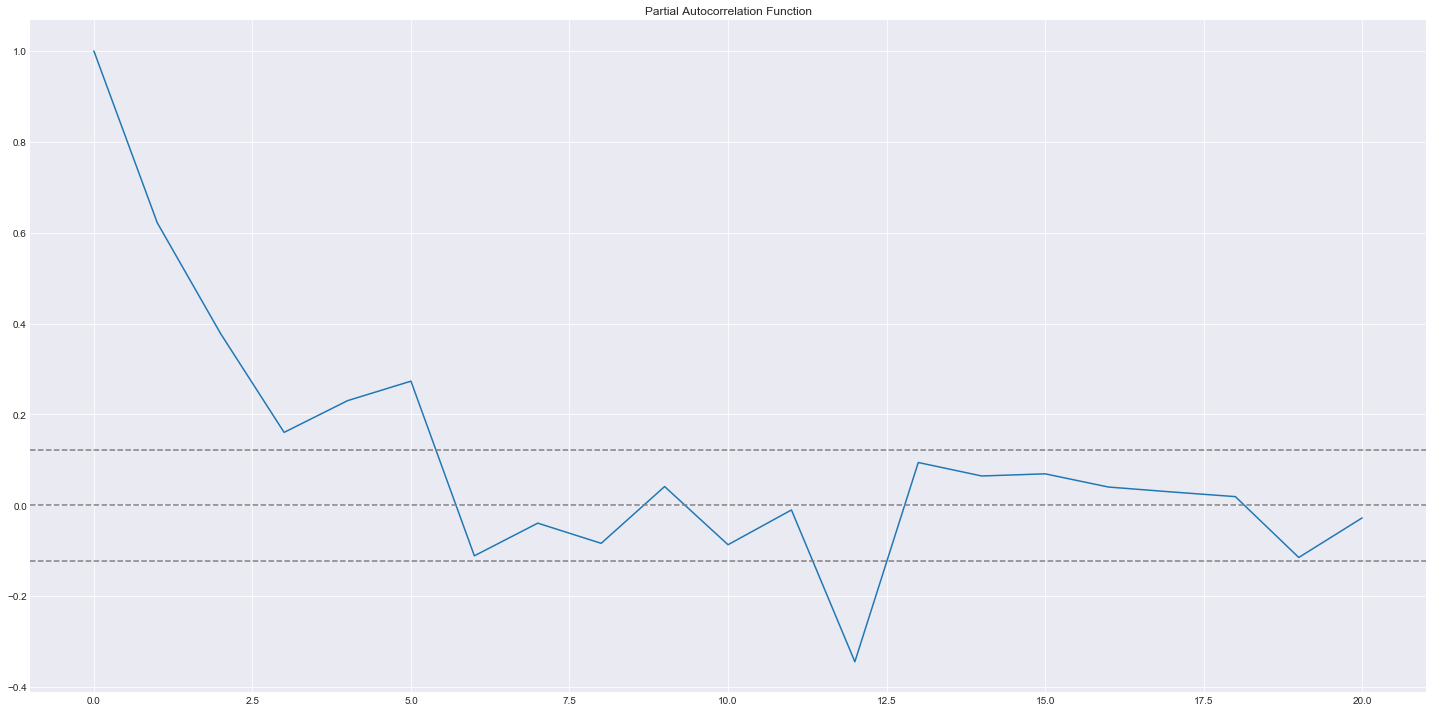

In [120]:
#Plot PACF:
plt.figure(figsize=(20,10))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(arimadata3.seasonal_first_difference)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(arimadata3.seasonal_first_difference)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Code cite: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

The dotted lines above and below 0 represent our confidence intervals, and our ACF and PACF functions help decide our parameters for our ARIMA model. Using our PACF, we find the point where the line first crosses either line to find our "p". As seen above, this occurs at around 11. We do the same with our ACF to find our "q". This doesn't really occur, so we will select 0. 

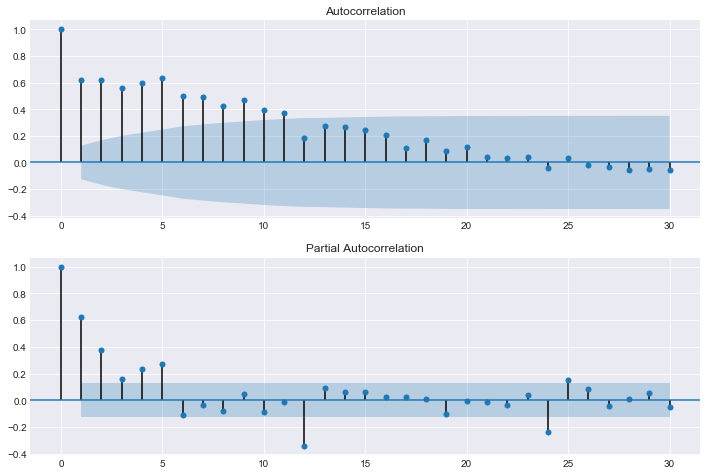

In [121]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arimadata3.seasonal_first_difference.iloc[13:], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arimadata3.seasonal_first_difference.iloc[13:], lags=30, ax=ax2)

Above are alternate visualizations of the ACF and PACF function. The gradual lessening of ACF dictates that I will not need an MA portion of the ARIMA model. For our ARIMA model, we will select p as 11, q as 0, and d as 1. For our seasonal terms, we have 12 as our q for 12 month seasons, and 1 as our d because property prices, especially rent, are affected by seasonality. 

Note: I do realize that 11 seems to be a drastic choice for our p. More research on the p parameter is needed, and perhaps more differencing is prudent.  

See (https://seekingalpha.com/article/4014343-arima-modeling-forecast-future-oil-prices)

In [122]:
mod = sm.tsa.statespace.SARIMAX(df, order=(11,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print results.summary()

                                  Statespace Model Results                                 
Dep. Variable:                       ZHVI_AllHomes   No. Observations:                  256
Model:             SARIMAX(11, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -1827.902
Date:                             Wed, 17 Jan 2018   AIC                           3683.805
Time:                                     13:29:32   BIC                           3733.437
Sample:                                 04-30-1996   HQIC                          3703.767
                                      - 07-31-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0830      0.010      8.271      0.000       0.063       0.103
ar.L2          0.0421      

In [123]:
start = datetime.datetime.strptime("2017-08-30", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= arimadata3.columns)
dfarima = pd.concat([df, future])

In [124]:
dfarima['forecast'] = results.predict(256, end=268, dynamic= True)   

In [126]:
dfarima.drop(labels=['Date'],axis=1,inplace=True)

In [131]:
dfarima[['ZHVI_AllHomes','forecast']]

ZHVI_AllHomes       forecast
1996-04-30       103550.0            NaN
1996-05-31       103650.0            NaN
1996-06-30       103500.0            NaN
1996-07-31       103600.0            NaN
1996-08-31       103900.0            NaN
1996-09-30       104300.0            NaN
1996-10-31       104500.0            NaN
1996-11-30       104600.0            NaN
1996-12-31       104800.0            NaN
1997-01-31       105300.0            NaN
1997-02-28       104700.0            NaN
1997-03-31       105400.0            NaN
1997-04-30       105700.0            NaN
1997-05-31       105900.0            NaN
1997-06-30       106200.0            NaN
1997-07-31       106500.0            NaN
1997-08-31       106300.0            NaN
1997-09-30       106650.0            NaN
1997-10-31       107100.0            NaN
1997-11-30       107500.0            NaN
1997-12-31       108000.0            NaN
1998-01-31       108600.0            NaN
1998-02-28       108800.0            NaN
1998-03-31       109200.0            NaN
1998-04-30       109300.0            NaN
1998-05-31       109500.0            NaN
1998-06-30       109800.0            NaN
1998-07-31       110700.0            NaN
1998-08-31       111000.0            NaN
1998-09-30       111400.0            NaN
1998-10-31       112000.0            NaN
1998-11-30       112600.0            NaN
1998-12-31       113200.0            NaN
1999-01-31       113500.0            NaN
1999-02-28       113900.0            NaN
1999-03-31       114400.0            NaN
1999-04-30       114800.0            NaN
1999-05-31       115200.0            NaN
1999-06-30       115700.0            NaN
1999-07-31       116100.0            NaN
1999-08-31       116700.0            NaN
1999-09-30       117200.0            NaN
1999-10-31       117800.0            NaN
1999-11-30       118400.0            NaN
1999-12-31       119100.0            NaN
2000-01-31       119700.0            NaN
2000-02-29       120300.0            NaN
2000-03-31       121000.0            NaN
2000-04-30       121600.0            NaN
2000-05-31       122300.0            NaN
2000-06-30       123000.0            NaN
2000-07-31       123450.0            NaN
2000-08-31       123900.0            NaN
2000-09-30       124550.0            NaN
2000-10-31       125300.0            NaN
2000-11-30       125950.0            NaN
2000-12-31       126600.0            NaN
2001-01-31       127600.0            NaN
2001-02-28       127900.0            NaN
2001-03-31       128700.0            NaN
2001-04-30       129300.0            NaN
2001-05-31       129900.0            NaN
2001-06-30       130400.0            NaN
2001-07-31       131000.0            NaN
2001-08-31       131400.0            NaN
2001-09-30       132000.0            NaN
2001-10-31       132600.0            NaN
2001-11-30       132900.0            NaN
2001-12-31       133500.0            NaN
2002-01-31       134000.0            NaN
2002-02-28       134400.0            NaN
2002-03-31       135100.0            NaN
2002-04-30       135700.0            NaN
2002-05-31       136300.0            NaN
2002-06-30       137000.0            NaN
2002-07-31       137600.0            NaN
2002-08-31       138300.0            NaN
2002-09-30       139200.0            NaN
2002-10-31       140100.0            NaN
2002-11-30       141000.0            NaN
2002-12-31       142000.0            NaN
2003-01-31       142850.0            NaN
2003-02-28       143600.0            NaN
2003-03-31       144400.0            NaN
2003-04-30       145150.0            NaN
2003-05-31       146200.0            NaN
2003-06-30       147300.0            NaN
2003-07-31       148050.0            NaN
2003-08-31       149000.0            NaN
2003-09-30       150000.0            NaN
2003-10-31       151000.0            NaN
2003-11-30       152000.0            NaN
2003-12-31       152800.0            NaN
2004-01-31       153500.0            NaN
2004-02-29       154300.0            NaN
2004-03-31       155200.0            NaN
2004-04-30       156400.0          

For whatever reason, my code does not seem to make a projection for every month. I am not sure what the error here is, but more revisions will be needed to my code and ARIMA progress.

In summary, I have made an attempt to predict housing prices in the United States using rental prices. I attempted two different machine learning techniques: Linear Regression and Seasonal Auto-Regressive Integrated Moving Average models. Examining two different datasets, one an overall US median and another US region panel data, I had variant results -- my US median regressions resulted in negative R2 scores, while my US region panel data was barely positive. However, my RMSE across the two models were relatively small, hovering around 2/3%. They are in percentage terms as I regressed on the percent differences of rental and property prices. 

Given my regression results, I have learned that the percent difference relationship between rental prices and property prices is tenuous, if rental and property prices are the only feature variables. To improve upon this model, I should seek out other pertinent, national feature variables that may explain variance in housing prices. However, it is my belief that teasing out a national relationship between rental and housing prices is difficult due to the vast differences in geography and how dependent property prices are on location. A further improvement may be to focus on one county or state. 

My ARIMA model was largely a practice exercise for me to become familiar with time-series analysis and code. I "parked" the data, and subsequently made a forecast for the next 12 months (when available). The ARIMA model took into account seasonality and autocorrelation, two features that my linear regression did not consider.       